# **Author : Girish R**

## **Task 6 : Prediction using Decision Tree Algorithm**

### **GRIP @ The Sparks Foundation**
Decision Trees are multipurpose Machine Learning algorithms that can handle classification, regression, and multioutput problems.I developed the Decision Tree classifier and graphically visualised it for the provided 'Iris' dataset. The goal of this job is for this classifier to be able to predict the correct class if we feed it additional data.  


#### **Technical Stack : Sikit Learn, Numpy Array, Seaborn, Pandas, Matplotlib, Pydot**

## **Step 1 - Importing Libraries**

In [ ]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pydotplus
import graphviz

%matplotlib inline
import matplotlib.image as mpimg
import pydot
from IPython.display import Image

## **Step 2 - loading Datasets**

In [ ]:
#Loading Dataset
iris = load_iris()
X=iris.data[:,:]
y=iris.target

In [ ]:
#Input data

df=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
df['Species']=iris['target']
df['Species']=df['Species'].apply(lambda x: iris['target_names'][x])

df.head(10)

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Petal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Petal Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Sepal Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Sepal Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

In [ ]:
df.nunique()

Petal length    35
Petal Width     23
Sepal Length    43
Sepal Width     22
Species          3
dtype: int64

In [ ]:
df.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df1 = df.drop_duplicates()

In [ ]:
df1.duplicated().sum()

0

## **Step 3 - Data Visualization comparing various features**

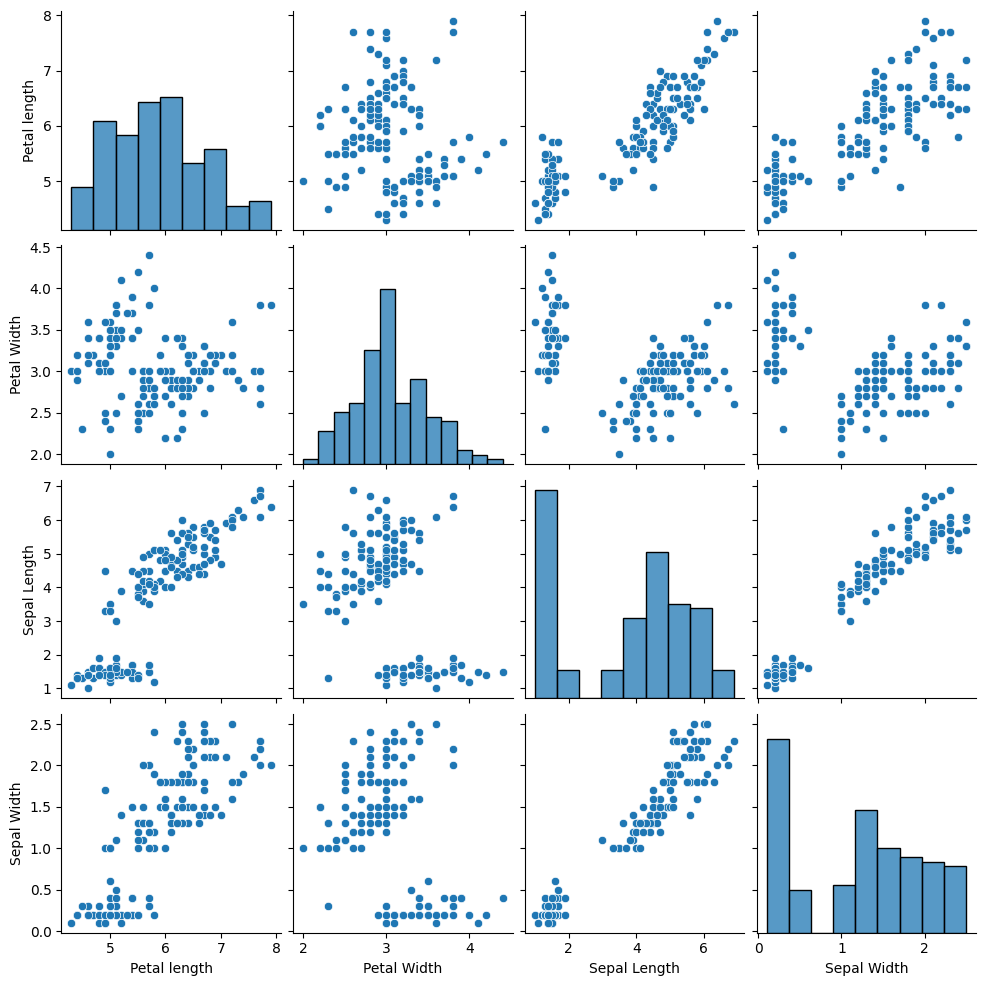

In [ ]:
#Heatmap
sns.pairplot(df1)

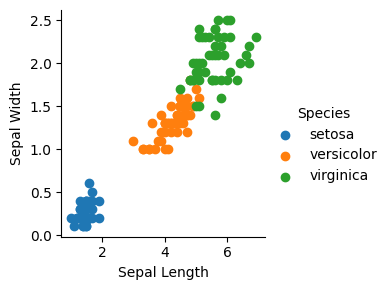

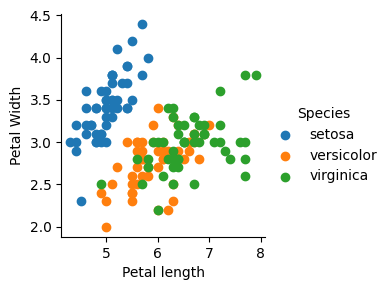

In [ ]:
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(df1,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(df1,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()

## **Step 4 - Decision Tree Model Training**

In [ ]:
#Model Traing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print('Training Complete')

Training Complete


In [ ]:
y_pred = tree_classifier.predict(X_test)

## **Step 5 - Comparing the actual and predicted flower classification**

In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


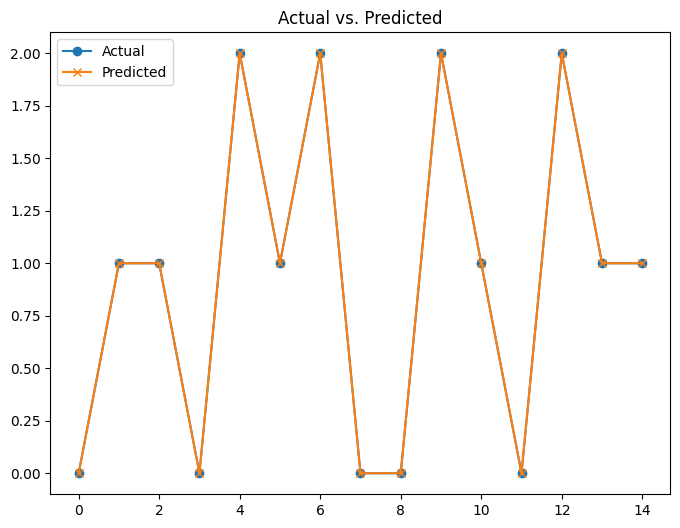

In [ ]:
#Visual Reprentation of Actual Vs Predicted
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['Actual'], label='Actual', marker='o')
plt.plot(df.index, df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

## **Step 6 - Visualizing the Trained Model**

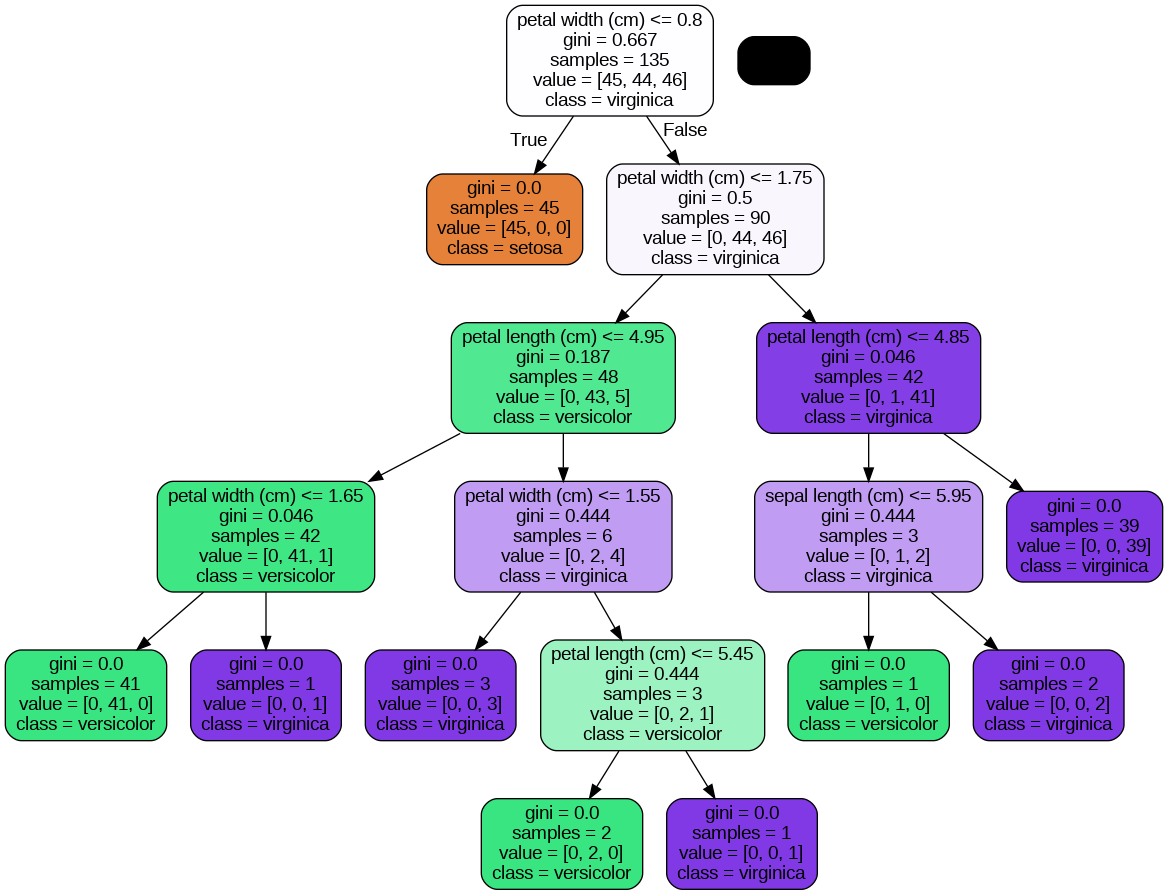

In [ ]:
#Visualizing the trained Decision Tree Classifier taking all 4 features in consideration

export_graphviz(
        tree_classifier,
        out_file="img\desision_tree.dot",
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)

(graph,) = pydot.graph_from_dot_file('img\desision_tree.dot')
graph.write_png('img\desision_tree.png')

Image(filename='img\desision_tree.png')

## **Step 7 - Predicting the class output for some random values of petal and sepal length and width**

In [ ]:
print("Class Names = ",iris.target_names)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print()
print('Output = ',tree_classifier.predict([[4.7, 3.2, 1.3, 0.2]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


## **Step 8 - Calculating the Model accuracy**

In [ ]:
# Model Accuracy
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 1.0


The accuracy of this model is 1 or 100% since I have taken all the 4 features of the iris dataset for creating the decision tree model.

## **Conclusion**

I was able to effectively do prediction using the Decision Tree Algorithm and analyse the model's accuracy score.